In [ ]:
#pip install tensorflow==2.5

     |████████████████████████████████| 454.3 MB 15 kB/s 
     |████████████████████████████████| 4.0 MB 41.1 MB/s 
     |████████████████████████████████| 132 kB 30.6 MB/s 
     |████████████████████████████████| 14.8 MB 37.8 MB/s 
     |████████████████████████████████| 462 kB 51.9 MB/s 
     |████████████████████████████████| 1.2 MB 47.1 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68719 sha256=1bd0d7b1d5c98374284e2da61e86a73f7e2a882d86ee5a66cf70c80a5eb7ff46
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Uninstalling typing-extensions-4.1.1:
      Successfully uninstalled typing-extensions-4.1.1
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting

In [ ]:
filename = "D21.txt"
data = open(filename, 'r', encoding='utf-8').read()
print(data[:300])

"ये लंदन है, दुनिया का सबसे बड़ा शहर।"
"मैं 22 वर्ष से यहाँ रह रहा हूँ, रोज़ाना इसी सड़क से गुजरता हूँ और रोज़ाना ये सड़क मुझसे मेरा नाम पूछती है।"
ये पूछती है कि चौधरी बलदेव सिंह कौन है? कहां से आया है? क्यों आया है?
"अब मैं इसे क्या जवाब दूँ, आधी उम्र गुज़ारने के बाद भी ये धरती मेरे लिए अजनबी है और 


In [ ]:
# pip install gradio

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.layers import Embedding
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
# import gradio as gr


In [ ]:
def generate_seq(model, tokenizer, max_length, seed_text, n_words):
	in_text = seed_text
    # generate a fixed number of words
	for _ in range(n_words):
        # encode the text as integer
		encoded = tokenizer.texts_to_sequences([in_text])[0]
		# pre-pad sequences to a fixed length
		encoded = pad_sequences([encoded], maxlen=max_length, padding='pre')
		# predict probabilities for each word
		yhat = np.argmax(model.predict(encoded), axis=-1)
		# map predicted word index to word
		out_word = ''
		for word, index in tokenizer.word_index.items():
			if index == yhat:
				out_word = word
				break
		# append to input
		in_text += ' ' + out_word
	return in_text

def generate(seed_text,n):
  return generate_seq(model,tokenizer,max_length-1,seed_text,int(n))

In [ ]:
# integer encode sequences of words
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])
encoded = tokenizer.texts_to_sequences([data])[0]

In [ ]:
# retrieve vocabulary size
vocab_size = len(tokenizer.word_index) + 1
#print('Vocabulary Size: %d' % vocab_size)
# encode 2 words -> 1 word
sequences = list()
for i in range(2, len(encoded)):
	sequence = encoded[i-2:i+1]
	sequences.append(sequence)

In [ ]:
print('Total Sequences: %d' % len(sequences))
# pad sequences
max_length = max([len(seq) for seq in sequences])
sequences = pad_sequences(sequences, maxlen=max_length, padding='pre')
print('Max Sequence Length: %d' % max_length)

Total Sequences: 14522
Max Sequence Length: 3


In [ ]:
# split into input and output elements
from numpy import array

sequences = array(sequences)
X, y = sequences[:,:-1],sequences[:,-1]

#print(X)
y = to_categorical(y, num_classes=vocab_size)
#print(y)


In [ ]:
# define model
model=Sequential()
model.add(Embedding(vocab_size, 10, input_length=max_length-1))
model.add(Bidirectional(LSTM(50)))
model.add(Dense(vocab_size, activation='softmax'))
print(model.summary())
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 2, 10)             25730     
_________________________________________________________________
bidirectional (Bidirectional (None, 100)               24400     
_________________________________________________________________
dense (Dense)                (None, 2573)              259873    
Total params: 310,003
Trainable params: 310,003
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:

# define the checkpoint
filepath="weights-improvement-{epoch:02d}-{loss:.4f}-bigger.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]
# fit the model
#uncomment the below code to train the model
history = model.fit(X, y, epochs=250, verbose=2, callbacks=callbacks_list)
# evaluate model

Epoch 1/250
454/454 - 8s - loss: 6.9340 - accuracy: 0.0266

Epoch 00001: loss improved from inf to 6.93398, saving model to weights-improvement-01-6.9340-bigger.hdf5
Epoch 2/250
454/454 - 4s - loss: 6.4818 - accuracy: 0.0281

Epoch 00002: loss improved from 6.93398 to 6.48185, saving model to weights-improvement-02-6.4818-bigger.hdf5
Epoch 3/250
454/454 - 4s - loss: 6.3790 - accuracy: 0.0320

Epoch 00003: loss improved from 6.48185 to 6.37897, saving model to weights-improvement-03-6.3790-bigger.hdf5
Epoch 4/250
454/454 - 8s - loss: 6.2740 - accuracy: 0.0390

Epoch 00004: loss improved from 6.37897 to 6.27401, saving model to weights-improvement-04-6.2740-bigger.hdf5
Epoch 5/250
454/454 - 8s - loss: 6.1727 - accuracy: 0.0409

Epoch 00005: loss improved from 6.27401 to 6.17275, saving model to weights-improvement-05-6.1727-bigger.hdf5
Epoch 6/250
454/454 - 11s - loss: 6.0857 - accuracy: 0.0430

Epoch 00006: loss improved from 6.17275 to 6.08573, saving model to weights-improvement-06-6.

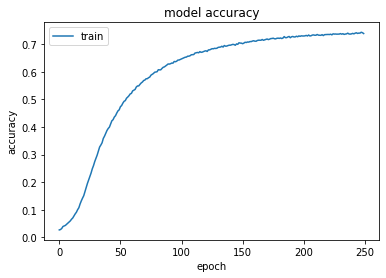

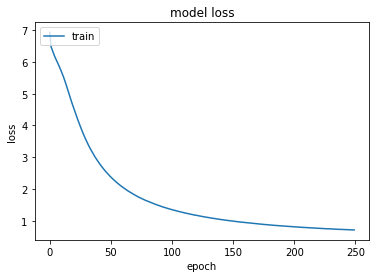

In [ ]:

import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#filename = "weights-improvement-250-0.6878-bigger.hdf5"
#model.load_weights(filename)
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
#Creating Interface with Gradio to interact with the model
# output_text = gr.outputs.Textbox()
# gr.Interface(generate,
#     [
#         gr.inputs.Textbox(label="seed_text"),
#         gr.inputs.Textbox(label="n"),
#     ],
#     output_text).launch(debug=True)

In [ ]:
print(generate_seq(model, tokenizer, max_length-1, 'सितारे दिन में', 40))
print(generate_seq(model, tokenizer, max_length-1, 'खुशी', 1))
print(generate_seq(model, tokenizer, max_length-1, 'आपसे मिलकर', 1))
print(generate_seq(model, tokenizer, max_length-1, 'मेरे लिए', 1))


सितारे दिन में तारे गिन रही थीं लोग कहते हैं कि सबकी ज़िदगी में ये एक्सपेरीमेंट करते देख लिया ना तो माँ उसकी माँ नहीं सहेली बन जाती है। अरे हमने तो खाया ही नहीं मिला ऐक्चुली राहुल की जगह मिल जाए। चलो रात गुजारने का बन्दोबस्त हो गया चलो आज भौजी ने इतने जतन से सँवारा सजाया बात हमारे मुन्ना की थी। देखो ज्योति मैं ठहरा तड़ीपार आदमी और बेवज़ह किसी लफड़े में नहीं आएगी। इसलिए बेहतर यही है श्यामलाल जी पचास हज़ार रुपये ऊपर से और माँगता सर हाँ श्यामलाल जी पचास हज़ार रुपये ऊपर से और माँगता सर हाँ श्यामलाल जी पचास हज़ार रुपये ऊपर से और माँगता सर हाँ श्यामलाल जी पचास हज़ार रुपये ऊपर से और माँगता सर हाँ श्यामलाल जी पचास हज़ार रुपये ऊपर से और माँगता सर हाँ श्यामलाल जी पचास हज़ार रुपये ऊपर से और माँगता सर हाँ श्यामलाल जी पचास हज़ार रुपये ऊपर से और माँगता सर हाँ श्यामलाल जी पचास हज़ार रुपये ऊपर से और माँगता सर हाँ श्यामलाल जी पचास हज़ार रुपये ऊपर से और माँगता सर हाँ श्यामलाल जी पचास हज़ार रुपये ऊपर से और माँगता सर हाँ श्यामलाल जी पचास हज़ार रुपये ऊपर से और माँगता सर हाँ श्यामलाल जी पचास हज़ार रुपये ऊपर से और माँगता स